# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.24.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [9]:
ID = 2053348+10
np.random.seed(ID)

In [10]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [11]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 61 67 60 52 61 66 60 61 49]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [443 412 374 369 389 425 382 396 388 422]


In [12]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


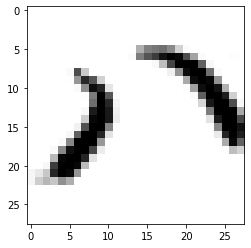

LABEL: 5
INPUT:


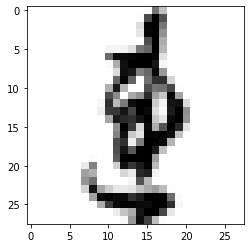

LABEL: 8
INPUT:


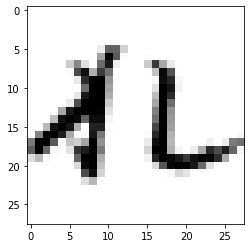

LABEL: 8


In [13]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [15]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (35,), (20,35,50), (40,20,30) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grid_search_mlp = GridSearchCV(mlp, parameters, cv=5)
grid_search_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid_search_mlp.best_params_)

print("Score with best parameters:")
print(grid_search_mlp.best_score_)

print("All scores on the grid:")
df = pd.DataFrame()
df["hidden_layer_size"] = parameters['hidden_layer_sizes']
df['mean_test_score'] = grid_search_mlp.cv_results_['mean_test_score']
df.style.hide_index()

/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.745
All scores on the grid:


hidden_layer_size,mean_test_score
"(10,)",0.651667
"(25,)",0.720000
"(50,)",0.745000
"(35,)",0.741667
"(20, 35, 50)",0.721667
"(40, 20, 30)",0.736667


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [16]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 64, 128, 256, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

grid_search_mlp_ = GridSearchCV(mlp, parameters, cv=kf)
grid_search_mlp_.fit(X_train, y_train)


print("Best parameters set found:")
print(grid_search_mlp_.best_params_)

print("Score with best parameters:")
print(grid_search_mlp_.best_score_)

print("All scores on the grid:")
df = pd.DataFrame()
df["batch_size"] = parameters['batch_size']
df['mean_test_score'] = grid_search_mlp_.cv_results_['mean_test_score']
df.style.hide_index()

Best parameters set found:
{'batch_size': 32}
Score with best parameters:
0.7516666666666666
All scores on the grid:


batch_size,mean_test_score
1,0.105000
32,0.751667
64,0.723333
128,0.721667
256,0.726667
480,0.725000


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
We observe that for _batch size_ =1 we have a negligible score, meaning that the NN is not effective at all. With 1 as batch size we are performing a pure SGD and probably we are moving toward a local minima. Increasing the batch size we obtain similar scores, all scores for _batch sizes_ $\in [32,480]$ give scores around 70%, reaching the maximum for _batch size_ = 32. We selected the batch sizes as power of two, hence, this hyperparameter is often tuned to an aspect of the computational architecture on which the implementation is being executed. In general a good default batch size is 32 <cite>[[1]]</cite> that indeed, is the value that we found. With all selected _batch sizes_ the NN converges but for 480. In this case we are performing a standard GD, that generally takes more iteration to reach the convergence. We tried to increase the number of iteration and, for example 1000 and it reaches the convergence with a score around 70%.

With respect to the number of layers and their sizes we can claim that 1 layer NN with high number of neurons seems to be the optimal solution, adding more layers we obtained low scores as for 1 layer architectures with few neurons.


[1]: https://arxiv.org/pdf/1206.5533.pdf 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.27 sec

Training MLP of size (20, 35, 50) ...
Done, training time: 0.22 sec

Training MLP of size (25,) ...
Done, training time: 0.26 sec

Training MLP of size (35,) ...
Done, training time: 0.29 sec

Training MLP of size (40, 20, 30) ...
Done, training time: 0.21 sec

Training MLP of size (50,) ...
Done, training time: 0.35 sec



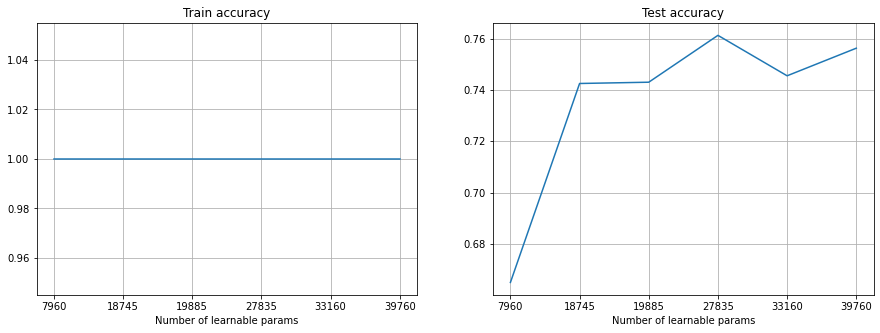

In [18]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (25,), (50,), (35,), (20,35,50), (40,20,30) ]
hl_labels = [param_count(t) for t in hl_sizes]
idx = np.argsort(hl_labels)
hl_sizes = np.array(hl_sizes, dtype=object)[idx]
hl_labels = np.array(hl_labels)[idx]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
- __Train accuracy__ : we have a flat distribution at 1, meaning that :(i) our trained NN are perfect, (ii) the size of our training set is to small to notice differences in the different architectures already in the training set. We can say that (ii) prevales w.r.t. (i), we tried increasing the size of the training set and we obtain different distributions.
- __Test accuracy__ : for simple 1-layer NN with few neurons we are underfitting, (ex (10,), (25,)) the structure is too simple to deal with our dataset. Lower scores come also with more layer NN (ex, (20, 35, 50), (40, 20, 30)), in this case we are overfitting, probably these architectures have more layers and weights than needed. As stated before for 1-layer high number of neurons we obtain the best results, meaning that we are aiming to NN with similiar structures.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gfrances/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


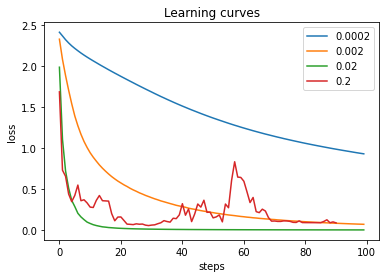

lr score
0.0002 0.7933333333333333
0.002 1.0
0.02 1.0
0.2 0.97
RESULTS FOR NN

Best parameters set found:
0.02
Score with best parameters:
1.0


In [26]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
for lr in lr_list:
    #print('Training MLP w lr {} ...'.format(lr))
    mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], 
                    batch_size=grid_search_mlp_.best_params_['batch_size'], 
                    learning_rate_init=lr, 
                    max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, n_iter_no_change=60)
    
    mlp.fit(X_train, y_train)
    scores[str(lr)]=mlp.score(X_train, y_train) # train or test??
    plt.plot(mlp.loss_curve_, label=str(lr))

plt.legend(loc='upper right')
plt.title("Learning curves")
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()

best_score = 0
best_lr = ""
print("lr", "score")
for lr, score in scores.items():
    print(lr, score)
    if score >= best_score :
        best_score = score
        best_lr = lr

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(best_lr)

print("Score with best parameters:")
print(best_score)




### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
With lower learning rates (0.0002) the learning curve is not steep at all, thus the learning process is slow and doesn't reach an accetable loss in 100 iteration. Increasing _lr_ (0.2) we have the opposite case, we are moving by bigger steps, meaning that the learning curve is very steep and the process is able to avoid local minima without too much effort. On the other hand the curve is not smooth, the learning process is effective (it reaches accetable loss before the 100 iterations) but rough (we had to increase the _n_iter_no_change_ parameter to reach it).

We obtain a perfect tradeoff between these two opposite cases with _lr = 0.02_, having a smooth and steep learning curve and reaching the best loss.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.238500


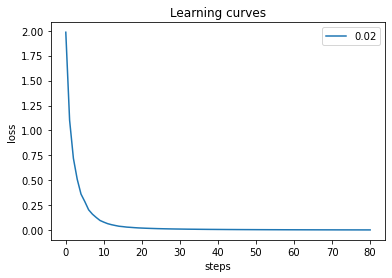

In [27]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], 
                    batch_size=grid_search_mlp_.best_params_['batch_size'], 
                    learning_rate_init=float(best_lr), 
                    max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)
mlp.fit(X_train, y_train)
training_error = 1 - mlp.score(X_train, y_train)
test_error      = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label=str(best_lr))

plt.legend(loc='upper right')
plt.title("Learning curves")
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [28]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [487 496 518 518 468 524 489 527 492 481]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [29]:
# use best architecture and params from before

best_mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], 
                    batch_size=grid_search_mlp_.best_params_['batch_size'], 
                    learning_rate_init=float(best_lr), 
                    max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, verbose=True)
best_mlp.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - best_mlp.score(X_train, y_train)
test_error      = 1 - best_mlp.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 0.96571502
Iteration 2, loss = 0.50890089
Iteration 3, loss = 0.38772314
Iteration 4, loss = 0.29875432
Iteration 5, loss = 0.22938044
Iteration 6, loss = 0.18285774
Iteration 7, loss = 0.14621677
Iteration 8, loss = 0.11545208
Iteration 9, loss = 0.09157277
Iteration 10, loss = 0.07244973
Iteration 11, loss = 0.05212144
Iteration 12, loss = 0.04152114
Iteration 13, loss = 0.03287799
Iteration 14, loss = 0.02699123
Iteration 15, loss = 0.02196235
Iteration 16, loss = 0.01890983
Iteration 17, loss = 0.01559938
Iteration 18, loss = 0.01371994
Iteration 19, loss = 0.01239358
Iteration 20, loss = 0.01108508
Iteration 21, loss = 0.01000863
Iteration 22, loss = 0.00906730
Iteration 23, loss = 0.00839157
Iteration 24, loss = 0.00796077
Iteration 25, loss = 0.00739981
Iteration 26, loss = 0.00691632
Iteration 27, loss = 0.00659408
Iteration 28, loss = 0.00619396
Iteration 29, loss = 0.00585610
Iteration 30, loss = 0.00559170
Iteration 31, loss = 0.00531757
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
Both our training error are null, that's mean that given the sizes we are able to train with good results over the training set. About test errors we have 0.2385 for the model trained with 600 data points, 0.122 with 5000 data points. As expected with more data points we trained a better model, this information wasn't clear from the training error but it's evident from the test (0.2385->0.122 is a huge improvement).

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

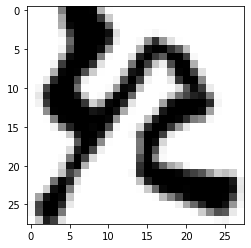

In [30]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = best_mlp.predict(X_test)

for y_pred, y_large_pred, y_true, x_true in zip(NN_prediction, large_NN_prediction, y_test, X_test):
    if (y_pred != y_true) and (y_large_pred == y_true) :
        plt.imshow(x_true.reshape(28,28), cmap = plt.cm.gray_r, interpolation = "nearest")
        plt.show()
        break;

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


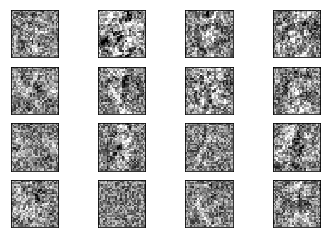

Weights with 5000 data points:


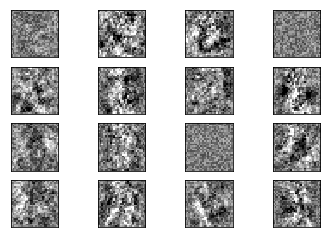

In [32]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
With more data points we would expect a smoother picture of the weights matrix. In fact, we are representing the weight matrix between inputs and the first layer, more data point means more different inputs so more variability on the weights and so a smoother picture.
That's not so clear from our results, probably the amount of data is not enough to highlight this effect. 

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [33]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]#2*m_training]
y_train, y_test = y[:m_training], y[m_training:]#2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_params = {'C': 10, 'gamma': 0.01}

SVM = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
SVM.fit(X_train, y_train)

training_error = 1-SVM.score(X_train, y_train)
test_error     = 1-SVM.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

print ('RESULTS FOR SVM')

SVM_training_score =  1-training_error
print("Training score SVM:")
print(SVM_training_score)

SVM_test_score = 1-test_error
print("Test score SVM:")
print(SVM_test_score)

Best SVM training error: 0.000000
Best SVM test error: 0.081455
RESULTS FOR SVM
Training score SVM:
1.0
Test score SVM:
0.9185454545454546


In [34]:
from sklearn import linear_model

# regL2 = #ADD YOUR CODE

# you can re-use your code from Lab 2

logistic_reg = linear_model.LogisticRegression(max_iter=1000).fit(X_train, y_train)
training_error = 1-logistic_reg.score(X_train, y_train)
test_error     = 1-logistic_reg.score(X_test, y_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')
print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.029000
Test error (reg): 0.244909


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

## [ANSWER TO QUESTION 6]

|                | NN   | SVM  | LR   |
|:--------------:|------|------|------|
| training error | 0.00 | 0.00 | 0.03 |
|   test error   | 0.12 | 0.08 | 0.24 |

Best results are achieved by the SVM model, LR performs worse than the others besided NN and SVM results are very similiar. We can compare these results as we have used training and testing data samples of the same sizes. It is true that in this case SVM performs better but, overall, we have also to consider the computation time that for the case of SVM is lot longer than NN.
